In [1]:
import numpy as np
import matplotlib.pyplot as plt

from graphqec import UnrotatedSurfaceCode, ThresholdLAB

In [2]:
rsc = UnrotatedSurfaceCode(
    distance = 3,
    depolarize1_rate = 0.01,
    depolarize2_rate = 0.01
)

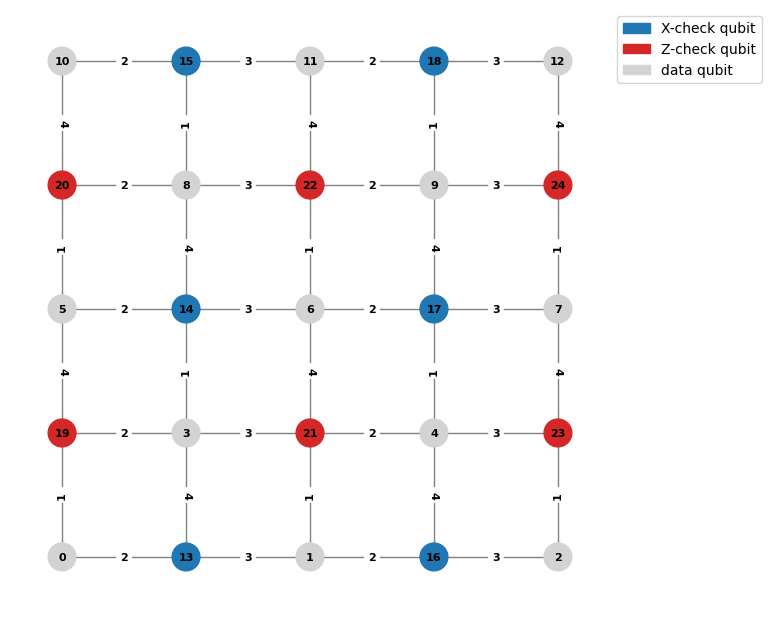

In [3]:
rsc.draw_graph()

In [4]:
rsc.build_memory_circuit(number_of_rounds=2)
rsc.memory_circuit.diagram()

q0: -R-DEPOLARIZE1(0.01)-----------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)------------M:rec[24]-DETECTOR:D18=rec[24]*rec[27]*rec[29]*rec[18]---------OBSERVABLE_INCLUDE:L0*=rec[24]*rec[25]*rec[26]-
                                                                                                                              | |                                                                                                                     | |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | |                                                                                                                     | |
 q1: -R-DEPOLARIZE1(0.01)-----------------------------------------------------------------------------------------------------|-|-------------------------------------@-DEPOLARIZE2(0.01)-------------------------------------------------------------|-|---------------------------------------------------------X-DEPOLARIZE2(0.01)-------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

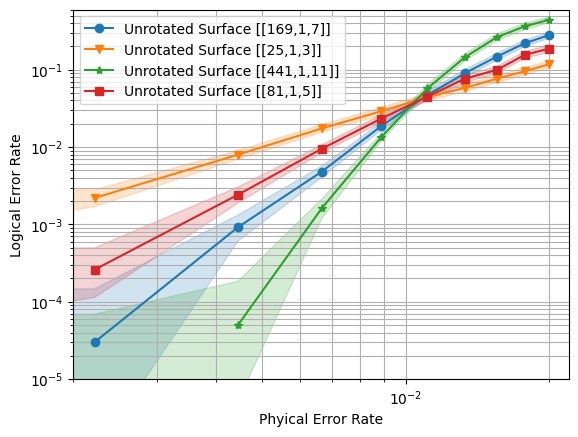

In [5]:
th = ThresholdLAB(
    configurations = [{"distance": d} for d in [3, 5, 7, 11]],
    code = UnrotatedSurfaceCode,
    error_rates = np.linspace(0, 0.02, 10),
    decoder='pymatching'
    
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**5,
    max_errors= 1000,
    logic_check="Z"
)

th.plot_stats(
    x_min = 2e-3, 
    x_max = 2.2e-2,
    y_min = 1e-5, 
    y_max = 6e-1
)

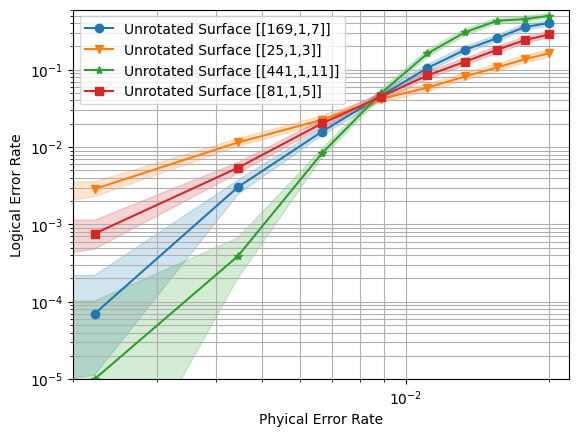

In [6]:
th = ThresholdLAB(
    configurations = [{"distance": d} for d in [3, 5, 7, 11]],
    code = UnrotatedSurfaceCode,
    error_rates = np.linspace(0, 0.02, 10),
    decoder='pymatching'
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**5,
    max_errors= 1000,
    logic_check="X"
)

th.plot_stats(
    x_min = 2e-3, 
    x_max = 2.2e-2,
    y_min = 1e-5, 
    y_max = 6e-1
)